In [85]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 


In [86]:
bank_data = pd.read_csv('https://github.com/sukhioo7/dataset/blob/main/Churn_Modelling.csv?raw=true')
bank_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [87]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# Data Visualization 

In [88]:
exited_counts = bank_data['Exited'].value_counts()

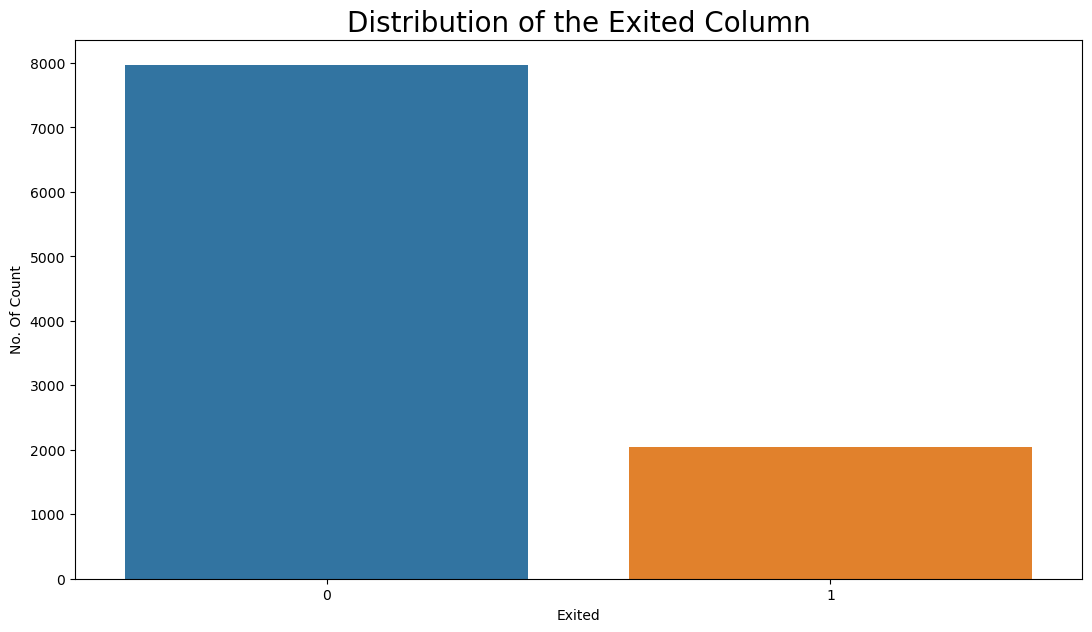

In [89]:
plt.figure(figsize=(13, 7))
sns.barplot(x=exited_counts.index,y=exited_counts)
plt.xlabel('Exited')
plt.ylabel('No. Of Count')
plt.title('Distribution of the Exited Column',size=20)
plt.show()

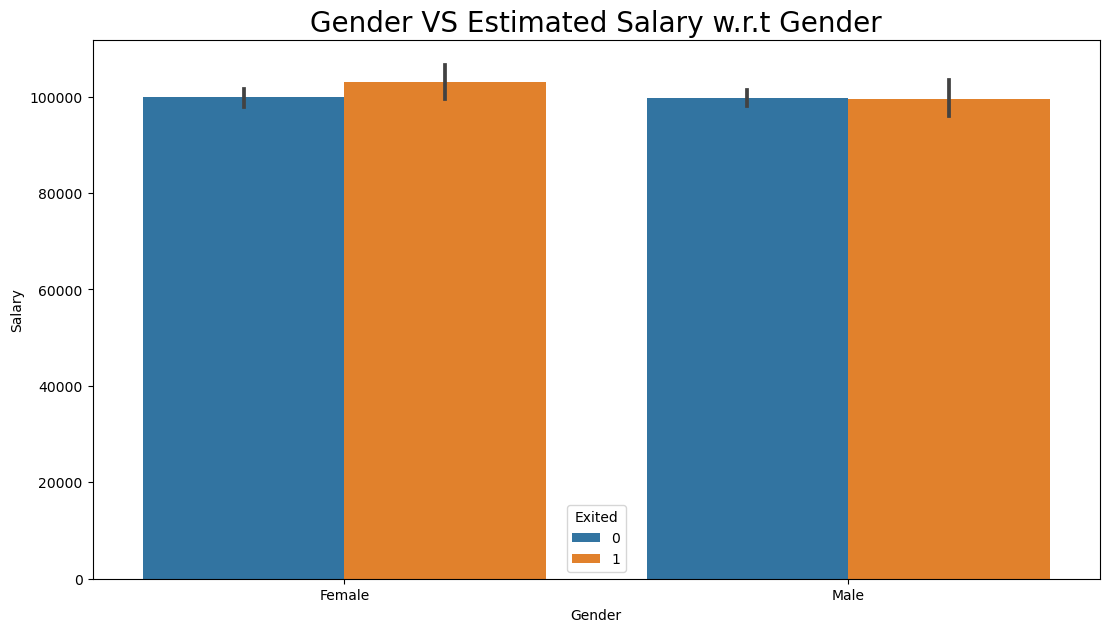

In [90]:
plt.figure(figsize=(13, 7))
sns.barplot(data=bank_data,x='Gender',y='EstimatedSalary',hue='Exited')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.title('Gender VS Estimated Salary w.r.t Gender',size=20)
plt.show()

# Encoding data 

In [91]:
# Applying Label Encoding 

bank_data['Gender'] = bank_data['Gender'].map({'Male':0,'Female':1})


# Applyig One Hot Encoding 

In [92]:
from sklearn.preprocessing import OneHotEncoder 

one_hot_encoder = OneHotEncoder()

In [93]:
one_hot_encoder.fit(bank_data[['Geography']])

OneHotEncoder()

In [94]:
one_hot_encoder.categories_

[array(['France', 'Germany', 'Spain'], dtype=object)]

In [95]:
temp = one_hot_encoder.transform(bank_data[['Geography']]).toarray()

In [96]:
temp_data = pd.DataFrame(data=temp,columns=['France', 'Germany', 'Spain'],
                        dtype='int')

In [97]:
temp_data.head()

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1


In [98]:
bank_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0


In [99]:
bank_data = pd.concat([bank_data,temp_data],axis=1)

# Dropping the irrerelavent columns 

In [100]:
bank_data.drop(['Geography','RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [101]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Gender           10000 non-null  int64  
 2   Age              10000 non-null  int64  
 3   Tenure           10000 non-null  int64  
 4   Balance          10000 non-null  float64
 5   NumOfProducts    10000 non-null  int64  
 6   HasCrCard        10000 non-null  int64  
 7   IsActiveMember   10000 non-null  int64  
 8   EstimatedSalary  10000 non-null  float64
 9   Exited           10000 non-null  int64  
 10  France           10000 non-null  int32  
 11  Germany          10000 non-null  int32  
 12  Spain            10000 non-null  int32  
dtypes: float64(2), int32(3), int64(8)
memory usage: 898.6 KB


# Manually Spliting Our Data Into Training And Testing

In [102]:
bank_exited_1 = bank_data[bank_data['Exited']==1]

In [103]:
bank_exited_0 = bank_data[bank_data['Exited']==0]



Here we are chosing the 80% records who have the value 0 of exited column for training and 20% for testing


In [104]:
train_1 = bank_exited_1.sample(frac=1).iloc[:6371]
test_1 = bank_exited_1.sample(frac=1).iloc[6371:]

In [105]:
train_0 = bank_exited_0.sample(frac=1).iloc[:1630]
test_0 = bank_exited_0.sample(frac=1).iloc[1630:]

Combining train_0 and train_1 to training data

In [106]:
training = pd.concat([train_0,train_1])

Combining test_0 and tes_1 to testing data 

In [107]:
testing = pd.concat([test_0,test_1])

Spliting our data into trainig and testing w.r.t X and Y

In [108]:
X_train = training.drop('Exited',axis=1)
Y_train = training['Exited']
X_test = testing.drop('Exited',axis=1)
Y_test = testing['Exited']
     

# Applying Decision Tree

In [109]:
from sklearn.tree import DecisionTreeClassifier 

decision_tree = DecisionTreeClassifier()

In [110]:
decision_tree.fit(X_train,Y_train)

DecisionTreeClassifier()

# Making prediction on testing data 

In [111]:
prediction =  decision_tree.predict(X_test)

# Checking the model's performance

In [112]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(prediction,Y_test))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      4710
           1       0.00      0.00      0.00      1623

    accuracy                           0.74      6333
   macro avg       0.37      0.50      0.43      6333
weighted avg       0.55      0.74      0.63      6333



C:\Users\canpa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\canpa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\canpa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [113]:
print(confusion_matrix(prediction,Y_test))

[[4710    0]
 [1623    0]]


# Applying Random Forest

In [114]:
from sklearn.ensemble import RandomForestClassifier 

random_forest = RandomForestClassifier(n_estimators=48)

# Fitting the model on training data

In [115]:
random_forest.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=48)

In [116]:
prediction = random_forest.predict(X_test)

# Checking the model's performance

In [117]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(prediction,Y_test))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      5066
           1       0.00      0.00      0.00      1267

    accuracy                           0.80      6333
   macro avg       0.40      0.50      0.44      6333
weighted avg       0.64      0.80      0.71      6333



C:\Users\canpa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\canpa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\canpa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [118]:
print(confusion_matrix(prediction,Y_test))

[[5066    0]
 [1267    0]]


# Finding the best no. of estimator for Random Forest using Elbow Method

In [119]:
error = []

for estimator in range(2,50):
  random_forest = RandomForestClassifier(n_estimators=estimator)
  random_forest.fit(X_train,Y_train)
  predictions = random_forest.predict(X_test)
  error.append(np.mean(predictions!=Y_test))
     


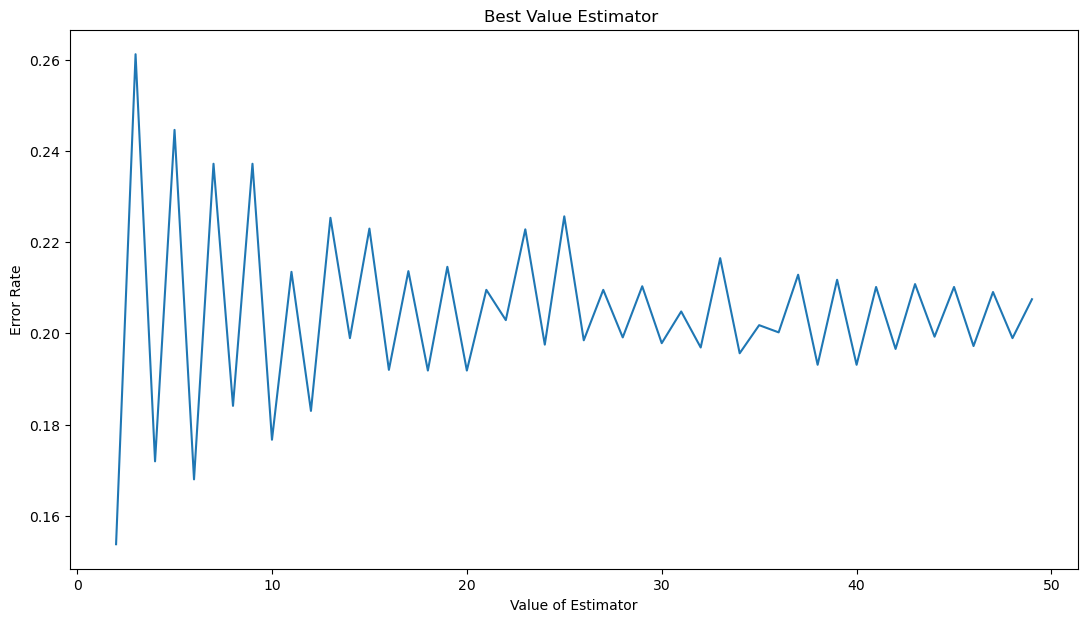

In [128]:
plt.figure(figsize=(13,7))
plt.plot(range(2,50),error)
plt.title('Best Value Estimator ')
plt.xlabel('Value of Estimator')
plt.ylabel('Error Rate')
plt.show()